In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [10]:
df= pd.read_csv('Earthquake_Data.csv')
df.head()

,Latitude,Longitude,DepthMeters,Magnitude
0,39.644,-75.483,5000,2.8
1,37.379,-80.746,11500,2.8
2,45.296,-73.475,18000,2.1
3,42.825,-78.239,5000,2.4
4,38.619,-80.909,100,3.4


In [11]:

df.shape


(1647, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     1647 non-null   float64
 1   Longitude    1647 non-null   float64
 2   DepthMeters  1647 non-null   int64  
 3   Magnitude    1647 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 51.6 KB


In [13]:
df.isnull().sum()

Latitude       0
Longitude      0
DepthMeters    0
Magnitude      0
dtype: int64

In [14]:

df.describe()

,Latitude,Longitude,DepthMeters,Magnitude
count,1647.000000,1647.000000,1647.000000,1647.000000
mean,39.903436,-79.008111,7559.720704,2.384827
std,2.410973,3.192442,5205.963953,0.459781
min,37.007700,-82.881000,100.000000,0.200000
25%,37.902400,-81.694150,3450.000000,2.100000
50%,38.477800,-80.831400,6400.000000,2.400000
75%,41.467200,-75.934050,11500.000000,2.600000
max,45.300900,-73.063400,32300.000000,5.200000


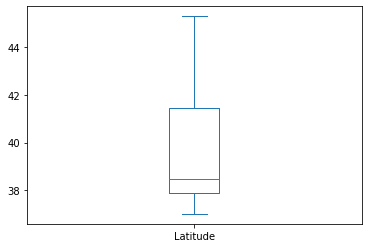

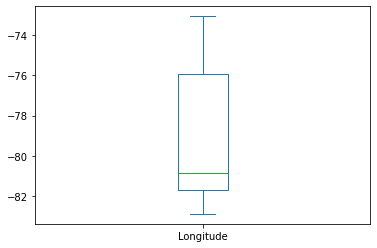

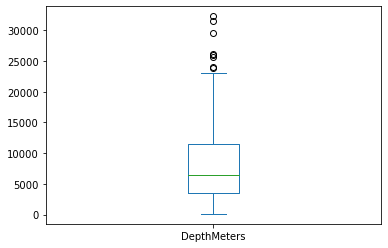

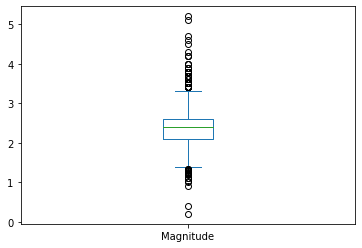

In [15]:
df['Latitude'].plot.box()
plt.show()
df['Longitude'].plot.box()
plt.show()
df['DepthMeters'].plot.box()
plt.show()
df['Magnitude'].plot.box()
plt.show()

In [16]:

def identify_outliers(data,col):
  Q1= data[col].quantile(0.25)
  Q3= data[col].quantile(0.75)
  IQR= Q3-Q1

  rowindex= data.index[((data[col]<(Q1-1.5*IQR)) | (data[col]> (Q3+1.5*IQR)))]
  return rowindex

In [17]:


row_index_list=[] 
for col in df.columns :
  row_index_list.extend(identify_outliers(df,col))

In [18]:
clean_data= df.drop(row_index_list)

In [19]:
clean_data.shape

(1562, 4)

In [20]:


clean_data= clean_data.drop(['Longitude','Latitude'],axis=1)


In [21]:
clean_data.shape

(1562, 2)

In [22]:


from sklearn.preprocessing import StandardScaler

In [23]:
ss= StandardScaler()
data= ss.fit_transform(clean_data)

In [24]:
data= pd.DataFrame(data,columns=['DepthMeters','Magnitude'])
data.head()


,DepthMeters,Magnitude
0,-0.488908,1.252394
1,0.803530,1.252394
2,2.095968,-0.735020
3,-0.488908,0.116729
4,-1.025767,0.116729


In [25]:
round(data.describe(),3)

,DepthMeters,Magnitude
count,1562.000,1562.000
mean,0.000,0.000
std,1.000,1.000
min,-1.463,-2.751
25%,-0.807,-0.735
50%,-0.211,0.117
75%,0.804,0.685
max,3.090,2.672


In [26]:


from sklearn.cluster import KMeans

In [27]:
wcss=[]
for i in range(1,8):
  kmean= KMeans(i)
  kmean.fit(data)
  wcss.append(kmean.inertia_)

In [28]:
wcss

[3124.0,
 1943.5822119519084,
 1257.977080004928,
 964.2748832142155,
 790.5899314514642,
 672.966828073821,
 590.9450394459951]

[]

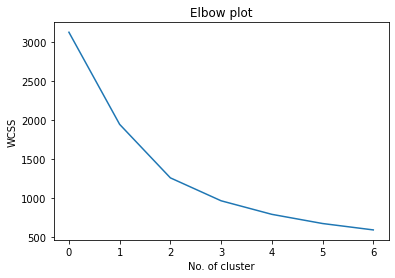

In [29]:

plt.plot(wcss)
plt.title("Elbow plot")
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')
plt.plot()

In [30]:


from sklearn.metrics import silhouette_score
sc_score=[]
for i in range(2,8):
  kmean=KMeans(i)
  kmean.fit(data)
  label=kmean.predict(data)
  print(f'silhouette score : {silhouette_score(data,label)}')
  sc_score.append(silhouette_score(data,label))
  

silhouette score : 0.3743704735416158
silhouette score : 0.39268003903375004
silhouette score : 0.3675083071920705
silhouette score : 0.3470760189754388
silhouette score : 0.3458336784043734
silhouette score : 0.3421864845094053


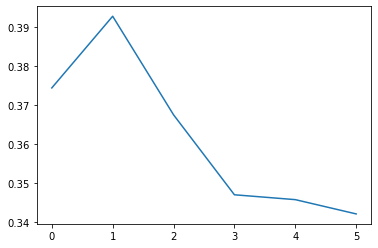

In [31]:

plt.plot(sc_score)


In [45]:


model= KMeans(3)
m=model.fit(data)

In [46]:


data['cluster']= m.labels_

data['cluster'].value_counts()

0    685
1    477
2    400
Name: cluster, dtype: int64

In [47]:


l0=data[data['cluster']==0]
l1=data[data['cluster']==1]
l2=data[data['cluster']==2]


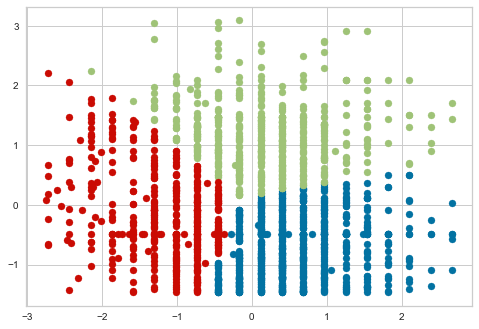

In [48]:
plt.scatter(l0['Magnitude'],l0['DepthMeters'])
plt.scatter(l1['Magnitude'],l1['DepthMeters'])
plt.scatter(l2['Magnitude'],l2['DepthMeters'])
plt.show()


In [49]:


m.cluster_centers_

array([[-0.71964524,  0.59192623],
       [ 1.17474623,  0.16696511],
       [-0.16849241, -1.21277955]])

In [50]:

l0.describe()

,DepthMeters,Magnitude,cluster
count,685.000000,685.000000,685.0
mean,-0.719645,0.591926,0.0
std,0.500074,0.651461,0.0
min,-1.463207,-0.451103,0.0
25%,-1.184836,0.116729,0.0
50%,-0.747395,0.400645,0.0
75%,-0.369606,0.968478,0.0
max,0.505275,2.671975,0.0


In [51]:

l1.describe()

,DepthMeters,Magnitude,cluster
count,477.000000,477.000000,477.0
mean,1.174746,0.166965,1.0
std,0.566041,0.774963,0.0
min,0.167253,-2.154601,1.0
25%,0.763763,-0.451103,1.0
50%,1.121669,0.116729,1.0
75%,1.479575,0.684562,1.0
max,3.090151,2.671975,1.0


In [52]:

l2.describe()

,DepthMeters,Magnitude,cluster
count,400.000000,400.000000,400.0
mean,-0.168492,-1.212780,2.0
std,0.732445,0.601168,0.0
min,-1.463207,-2.750825,2.0
25%,-0.647977,-1.586768,2.0
50%,-0.290071,-1.018936,2.0
75%,0.261203,-0.735020,2.0
max,2.215270,-0.365928,2.0
